## Логистическая регрессия

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Реализуйте обучение логистической регрессии с $L^1$ и $L^2$ регуляризацией с помощью метода Stochastic Gradient Descent (SGD)

#### Замечания
* В SGD градиент расчитывается по одному случайному объекту
* Для отладки работы алгоритма, реализуйте возможность сохранения или вывода ошибки модели после очередной итерации
* Правило останова - максимальное количество эпох
    
Эпохой в SGD и MB-SGD называется один проход по **всем** объектам в выборке (тем или иным способом)

# Реализация модели

In [47]:
from sklearn.metrics import zero_one_loss
from sklearn.base import BaseEstimator, ClassifierMixin
import math


# gradients = 2. / m * X_b.T.dot(X_b.dot(theta) - y)
# theta_old = theta
# theta = theta - alpha * gradients
# dist = np.linalg.norm(theta - theta_old)
# if dist < eps:
#     break

# def predict(x, w):
#     return np.sign(x.dot(w))

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    """
    Предполагается, что в выборке всегда 2 класса
    """

    regularisation_algorithms = ['l1', 'l2', None]
    
    def __init__(self, C=1, alpha=0.01, max_epoch=10, penalty=None):
        """
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.regularisation = ""
        if penalty in self.regularisation_algorithms:
            self.penalty = penalty
        else:
            raise AttributeError('Unknown reuglarisation algorithm {0}'.format(penalty))
    
    def fit(self, X, y=None):
        '''
        Обучение модели
        '''
        self.collection = self.__add_ones_for_c_coefficient(X)
        self.function_values = y
        self.theta = np.random.randn(3, 1)

        self.__gradient_descent()
        
        return self

    def __add_ones_for_c_coefficient(self, x):
        return np.hstack([x, np.ones((len(x), 1))])

    def __random_theta(self):
        # Line equation is A * x + B * x + C = 0. So we generate random A, B and C here.
        return np.random.randn(3, 1)

    def __gradient_descent(self):
        theta = self.theta
        print('Theta {0}'.format(theta))
        for _epoch in range(self.max_epoch):
            p = np.random.permutation(len(self.collection))
            for idx in p:
                xi = self.collection[idx]
                yi = self.function_values[idx]
                margin = self.__margin(theta, xi, yi)
                sigmoid = self.__sigmoid(margin)
                gradient = self.alpha * yi * xi * sigmoid
                gradient = gradient.reshape(3, 1)
                theta = theta + gradient

        self.theta = theta
        return True

    def __sigmoid(self, z):
        sigmoid = 1 / (1 + np.exp(-z))
        print('sigmoid_value {0} z {1}'.format(sigmoid, z))
        return  sigmoid

    def __margin(self, theta, x, y):
        return theta.T.dot(x) * y

#     2(1 + eM)^−1
# 
# 
# w := w + η yixi σ (−Mi(w))

    
    
    def partial_fit(self, X, y=None):
        '''
        По желанию - метод дообучения модели на новых данных
        '''
    
        return self
        
    def predict(self, X):
        '''
        Возвращение метки класса
        '''
        
        return y_hat
    
    def predict_proba(self, X):
        '''
        Возвращение вероятности каждого из классов
        '''

        
        return y_hat_proba

c = MySGDClassifier(C=1, alpha=0.5, max_epoch=50, penalty="l2")

np.random.seed(1)

size = 5

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(size, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(size, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
Y = np.r_[np.ones(size), np.zeros(size)]

c.fit(X, Y)
print(c.theta)



Theta [[-1.10061918]
 [ 1.14472371]
 [ 0.90159072]]
sigmoid_value [0.5] z [-0.]
sigmoid_value [0.5] z [-0.]
sigmoid_value [0.5] z [-0.]
sigmoid_value [0.5] z [-0.]
sigmoid_value [0.0098511] z [-4.61027226]
sigmoid_value [0.00271208] z [-5.90732538]
sigmoid_value [0.00111275] z [-6.79980868]
sigmoid_value [0.5] z [-0.]
sigmoid_value [0.0074443] z [-4.89283466]
sigmoid_value [0.00121038] z [-6.71561262]
sigmoid_value [0.00122865] z [-6.70061101]
sigmoid_value [0.00817755] z [-4.79815138]
sigmoid_value [0.5] z [-0.]
sigmoid_value [0.5] z [-0.]
sigmoid_value [0.00323933] z [-5.72914444]
sigmoid_value [0.00140074] z [-6.56935052]
sigmoid_value [0.01273306] z [-4.35073907]
sigmoid_value [0.5] z [-0.]
sigmoid_value [0.5] z [-0.]
sigmoid_value [0.5] z [-0.]
sigmoid_value [0.5] z [-0.]
sigmoid_value [0.00380133] z [-5.56859537]
sigmoid_value [0.01431156] z [-4.23227249]
sigmoid_value [0.5] z [-0.]
sigmoid_value [0.5] z [-0.]
sigmoid_value [0.01110483] z [-4.48920795]
sigmoid_value [0.5] z [-0.]

## Проверка на синтетических данных (2 балл)

Запустите ваш алгоритм на синтетических данных. 
Выведите полученные веса и нарисуйте разделяющую границу между классами.

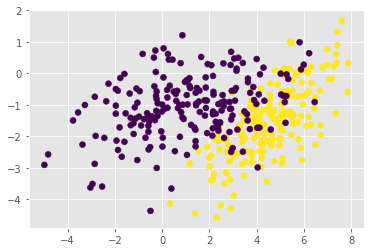

In [21]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

plt.scatter(X[:,0], X[:,1], c=y)

In [5]:
model = MySGDClassifier()
model.fit(X, y)

MySGDClassifier(C=1, alpha=0.01, max_epoch=10, penalty=None)

In [22]:
print(X)

[[ 5.10023581e+00 -2.69111611e+00]
 [ 7.86133980e+00 -5.90275828e-01]
 [ 3.03408318e+00 -3.87586870e+00]
 [ 4.27296419e+00 -2.48115650e+00]
 [ 5.11589775e+00 -1.18894612e+00]
 [ 6.68141026e+00 -5.51816051e-01]
 [ 4.68251252e+00 -2.11149017e+00]
 [ 5.00051149e+00 -1.68815112e+00]
 [ 4.19226260e+00 -2.95938987e+00]
 [ 3.21885639e+00 -2.53373075e+00]
 [ 5.48042789e+00  9.65286729e-01]
 [ 3.38675247e+00 -2.88528098e+00]
 [ 2.31845149e+00 -4.57929624e+00]
 [ 4.21922422e+00 -1.78635389e+00]
 [ 6.70403815e+00 -1.65073636e+00]
 [ 5.06724378e+00 -1.42142792e+00]
 [ 1.52880530e+00 -2.47440858e+00]
 [ 4.73452345e+00 -1.19659111e+00]
 [ 6.30356977e+00 -1.62232867e+00]
 [ 4.04654587e+00 -1.53198075e+00]
 [ 2.36997309e+00 -1.89717198e+00]
 [ 7.42616309e+00  1.32563647e+00]
 [ 3.84288855e+00 -1.54273770e+00]
 [ 5.66623553e+00  2.42285727e-02]
 [ 4.18088958e+00 -4.79073946e-01]
 [ 5.08035375e+00 -5.74104753e-01]
 [ 2.72905172e+00 -2.13586164e+00]
 [ 5.14249781e+00 -1.23478872e+00]
 [ 4.95370785e+00 -1

## Анализ сходимости

Покажите сходимость вашего метода: изобразите графики зависимости значения функции потерь (по всей выборке) после очередной итерации/эпохи (выбрать одно) для разных `alpha`.

In [9]:
print(np.ones((10, 1)))

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
